# P2 IAA: Regresión Lineal Múltiple

In [ ]:
!pip install turicreate

In [ ]:

import pandas as pd
from sklearn import linear_model,datasets
from sklearn.utils import Bunch
import csv
import time
import numpy as np
import random as rd
import turicreate as tc
import matplotlib.pyplot as plt

# Connect to GDrive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/ColabNotebooks/IAA/smallDataSet.csv'
# path = '/content/gdrive/MyDrive/Uni/IAA/smallDataset.csv'
df = pd.read_csv(path)

x = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

df.head()

,x1,x2,y
0,1,2,1.03
1,1,3,-1.44
2,2,3,4.53
3,2,4,2.24
4,3,2,13.27


# Implementacion propia - Regresion Lineal


## Usando epocas


In [ ]:
def MAE(x,y,weights,bias):
  coste = np.sum(abs((x.dot(weights) + bias) - y) / (len(y)))
  return coste

def MSE(x,y,weights,bias):
  coste = np.sum((((x.dot(weights) + bias) - y) ** 2) / (len(y)))
  return coste

def gradienteDescMAE(x,y,weights,bias,lr,epochs,maxError):
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch=0

    while coste > maxError and epoch < epochs:
      yEst = x.dot(weights) + bias
      loss = yEst - y
      
      for l in range(len(loss)):
        if loss[l] < 0:
          loss[l]=-1
        else:
          loss[l]=1
      
      
      weight_gradient = x.T.dot(loss) / len(y)
      bias_gradient = np.sum(loss) / len(y)
      
      weights = weights - lr*weight_gradient
      bias = bias - lr*bias_gradient

      listaErrorMAE.append(MAE(x, y, weights, bias))
      listaErrorMSE.append(MSE(x, y, weights, bias))
      epoch += 1

    #return weights, bias, error MAE y MSE a lo largo del entrenamiento
    return weights, bias, listaErrorMAE, listaErrorMSE

def gradienteDescMSE(x,y,weights,bias,lr,epochs,maxError):
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch = 0

    while coste > maxError and epoch < epochs:
      yEst = x.dot(weights) + bias
      loss = yEst - y
      
      weight_gradient = x.T.dot(loss) / len(y)
      bias_gradient = np.sum(loss) / len(y)
      
      weights = weights - lr * weight_gradient
      bias = bias - lr * bias_gradient

      listaErrorMAE.append(MAE(x, y, weights, bias))
      listaErrorMSE.append(MSE(x, y, weights, bias))
      epoch += 1

    #return weights, bias, error MAE y MSE a lo largo de entrenamiento
    return weights, bias, listaErrorMAE, listaErrorMSE



### Error absoluto
Ejecutamos 100 iteraciones para calcular el tiempo de ejecución medio

------------------------------------------------------------------
Modelo:  [ 6.00285714 -2.48285714] -0.03142857142857196
------------------------------------------------------------------
Tiempo medio de ejecucion: 0.049841s
Error Absoluto final: 0.087347
Error Cuadratico final: 0.016008
------------------------------------------------------------------


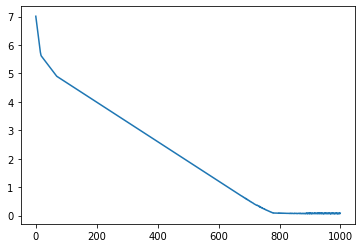

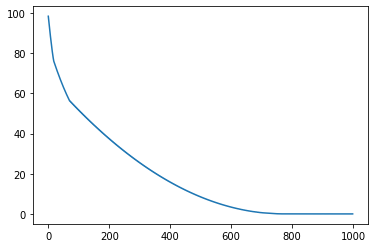

In [ ]:
if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.01
    ## Fija las epocas
    epochs = 1000
    ## Umbral de error permitido
    maxError = 0.001
    ## Variable para medir el tiempo de ejecucion
    tiempo = 0

    for i in range(100):
      tinicio=time.time()
      w, b, costMAE, costMSE = gradienteDescMAE(x, y, np.zeros(x.shape[1]), 0, lr,epochs,maxError)
      tfinal= time.time()
      tiempo +=tfinal-tinicio
      
    tiempo /= 100
    print("------------------------------------------------------------------")
    print("Modelo: ", w , b)
    print("------------------------------------------------------------------")
    print("Tiempo medio de ejecucion:",f'{tiempo:0.6f}s')
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")

    plt.plot(costMAE)
    plt.show()
    plt.plot(costMSE)
    plt.show()


### Error cuadratico
Realizamos 100 iteraciones para calcular el tiempo de ejecución medio

------------------------------------------------------------------
Modelo:  [ 5.94845784 -2.53781562] 0.36344615092203264
------------------------------------------------------------------
Tiempo medio de ejecucion: 0.007423s
Error Absoluto final: 0.131297
Error Cuadratico final: 0.018471
------------------------------------------------------------------


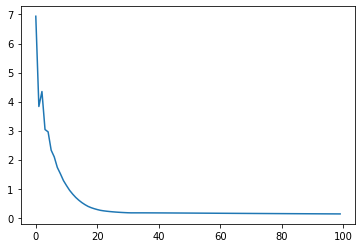

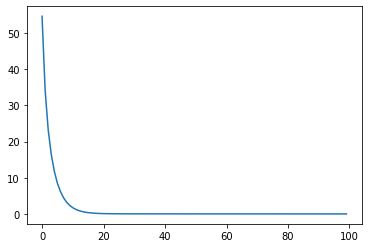

In [ ]:
if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.1
    ## Fija las epocas
    epochs = 100
    ## Umbral de error permitido
    maxError = 0.001
    ## Variable para medir el tiempo de ejecucion
    tiempo = 0

    for i in range(100):
      tinicio=time.time()
      w, b, costMAE, costMSE = gradienteDescMSE(x, y, np.zeros(x.shape[1]), 0, lr,epochs,maxError)
      tfinal = time.time()
      tiempo +=tfinal-tinicio
      
    tiempo /= 100

    print("------------------------------------------------------------------")
    print("Modelo: ", w , b)
    print("------------------------------------------------------------------")
    print("Tiempo medio de ejecucion:",f'{tiempo:0.6f}s')
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")

    plt.plot(costMAE)
    plt.show()
    plt.plot(costMSE)
    plt.show()


Como podemos ver, si usamos el MSE como funcion de error en el gradiente descendiente, obtenemos resultados parecidos en muchisimas menos epocas (evidentemente el lr de ambos es diferente)

## TuriCreate

In [ ]:
from turicreate.toolkits.regression.linear_regression import LinearRegression
# Load the data
data =  tc.SFrame(path)

## Fijar el numero maximo de iteraciones
maxiterations=1000

# Automatically picks the right model based on your data.
model = tc.linear_regression.create(data, target='y', features = ['x1','x2'], max_iterations=maxiterations)
print(model.coefficients)


Read 7 lines. Lines per second: 203.838

Finished parsing file /content/gdrive/MyDrive/ColabNotebooks/IAA/smallDataSet.csv

Parsing completed. Parsed 7 lines in 0.03475 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/gdrive/MyDrive/ColabNotebooks/IAA/smallDataSet.csv

Parsing completed. Parsed 7 lines in 0.013826 secs.

+-------------+-------+---------------------+---------------------+
|     name    | index |        value        |        stderr       |
+-------------+-------+---------------------+---------------------+
| (intercept) |  None | 0.05240794104558599 |  0.193992579593948  |
|      x1     |  None |  5.975723751721802  | 0.05204271620406507 |
|      x2     |  None |  -2.459921780743396 | 0.04304818354787499 |
+-------------+-------+---------------------+---------------------+
[3 rows x 4 columns]



Linear regression:

--------------------------------------------------------

Number of examples          : 7

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000227     | 0.210264           | 0.105253                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

## Scikit learn


In [ ]:
def load_my_dataset(path):
    with open(file=path) as csv_file:
        data_reader = csv.reader(csv_file)
        feature_names = next(data_reader)[:-1]
        data = []
        target = []
        for row in data_reader:
            features = row[:-1]
            label = row[-1]
            data.append([float(num) for num in features])
            target.append(float(label))
        
        data = np.array(data)
        target = np.array(target)
    return Bunch(data=data, target=target, feature_names=feature_names)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

data = load_my_dataset(path)
SKdataX = data.data
SKdataY = data.target

modelSK = linear_model.LinearRegression()
modelSK.fit(SKdataX,SKdataY)

print("------------------------------------------------------------------")
print("Modelo de Scikit-Learn: ",modelSK.coef_,modelSK.intercept_)
print("------------------------------------------------------------------")
print("MAE: ",mean_absolute_error(SKdataY, modelSK.predict(SKdataX)))
print("MSE: ",mean_squared_error(SKdataY, modelSK.predict(SKdataX)))
print("------------------------------------------------------------------")


------------------------------------------------------------------
Modelo de Scikit-Learn:  [ 6.02426471 -2.47485294] -0.01588235294117979
------------------------------------------------------------------
MAE:  0.07701680672268878
MSE:  0.007876890756302438
------------------------------------------------------------------


# Regresion Lineal con Diabetes Dataset

Lectura Dataset

In [ ]:

path_diabetes = '/content/gdrive/MyDrive/ColabNotebooks/IAA/diabetes.csv'
#path_diabetes = '/content/gdrive/MyDrive/Uni/IAA/diabetes.csv'
data = pd.read_csv(path_diabetes,header=0)
x= data.drop(['Y'],axis=1)
y = data['Y']


## Implementacion Propia 

### Gradiente descendiente usando el MAE

Volvemos a definir una funcion para el gradiente descendiente usando el MAE como función de error para incorporar mini-batches, pues sin ellos como está en la primero implementación que codificamos para el dataset de juguete el algoritmo no podía ser ejecutado.

Debemos usar un learning rate extremadamente pequeño para que el modelo tenga un error aceptable.

------------------------------------------------------------------
Modelo:  [ 1.70950000e-01  4.83653000e+00  2.67610920e+00  1.19875735e+00
  1.75179700e+00 -1.79649470e+00 -3.45431750e+00 -7.82603119e+00
  7.09033180e-03  2.49264000e-01] 7.05305099999449
------------------------------------------------------------------
Tiempo de ejecucion: 251.796597
Error Absoluto final: 47.610124
Error Cuadratico final: 3431.008924
------------------------------------------------------------------
---MAE del entrenamiento---
------------------------------------------------------------------


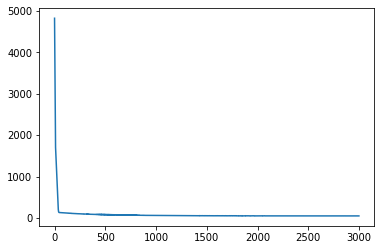

------------------------------------------------------------------
---MSE del entrenamiento---
------------------------------------------------------------------


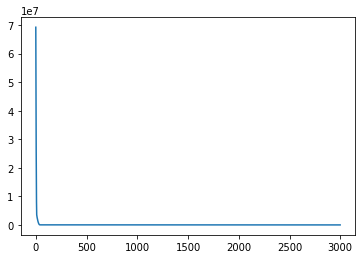

------------------------------------------------------------------


In [ ]:
def gradienteDescMAE(dataset,weights,bias,lr,epochs,maxError):
    
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch=0
    x_test= dataset.drop(['Y'],axis=1)
    y_test = dataset['Y']
    sizeBatch=dataset.shape[0]/100
    while coste > maxError and epoch < epochs:
      for i in range(0,100):
        
        data_sample=dataset.iloc[int(i*sizeBatch):int((i+1)*sizeBatch)]
        x=data_sample.drop(['Y'],axis=1).to_numpy()
        y = data_sample['Y'].to_numpy()
        yEst = x.dot(weights) + bias
        loss = yEst - y
        
        for l in range(len(loss)):
          if loss[l] < 0:
            loss[l]=-1
          else:
            loss[l]=1
        
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        weights = weights - lr*weight_gradient
        bias = bias - lr*bias_gradient

      
      listaErrorMAE.append(MAE(x_test, y_test, weights, bias))
      listaErrorMSE.append(MSE(x_test, y_test, weights, bias))
      epoch += 1

    return weights, bias, listaErrorMAE, listaErrorMSE

if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.00001
    ## Fija las epocas
    epochs = 3000
    ## Umbral de error permitido
    maxError = 0.1
    ## Variable para medir el tiempo de ejecución
    tiempo = 0

    
    tinicio=time.time()
    model=np.zeros(x.shape[1])  
    for weight in range(len(model)):
      model[weight]=rd.randint(-10,10)
    w, b, costMAE, costMSE = gradienteDescMAE(data, model, rd.randint(-10,10), lr,epochs,maxError)

    tfinal= time.time()
    tiempo+=tfinal-tinicio
      
    print("------------------------------------------------------------------")
    print("Modelo: ", w , b)
    print("------------------------------------------------------------------")
    print("Tiempo de ejecucion:",f'{tiempo:0.6f}')
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")
    
    print("---MAE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMAE)
    plt.show()
    print("------------------------------------------------------------------")
    print("---MSE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMSE)
    plt.show()
    print("------------------------------------------------------------------")

Como podemos ver obtenemos un modelo mejor que el propuesto por las librerías aunque en más tiempo. El learning rate debe ser muy pequeño para que los pesos se ajusten correctamente. El MSE es tan elevado porque hay instancias del dataset que no se ajustan bien al modelo con lo que al sumar los cuadrados el error se dispara (además estamos usando como funcion de error el MAE, el MSE es meramente ilustrativo)

### Gradiente descendiente usando el MSE

Volvemos a definir una funcion para el gradiente descendiente usando el MSE como función de error para incorporar mini-batches, pues sin ellos como está en la primero implementación que codificamos para el dataset de juguete el algoritmo no podía ser ejecutado. 

Debemos usar un learning rate extremadamente pequeño para que el modelo tenga un error aceptable.

------------------------------------------------------------------
Modelo:  [ 4.10988600e-01  5.64918391e+00  8.15059195e-01  1.78732790e+00
  1.48768243e-01  9.73089189e-02 -2.16969875e+00 -9.41004462e+00
  8.30394128e-03  3.62333173e-01] 6.000430342219042
------------------------------------------------------------------
Tiempo de ejecucion: 336.257510
Error Absoluto final: 52.298921
Error Cuadratico final: 4111.920344
------------------------------------------------------------------
---MAE del entrenamiento---
------------------------------------------------------------------


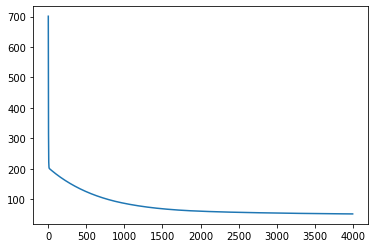

------------------------------------------------------------------
---MSE del entrenamiento---
------------------------------------------------------------------


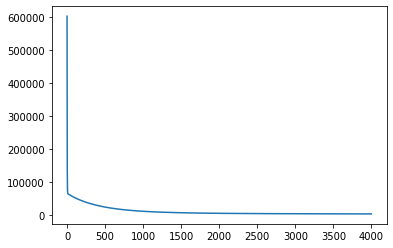

------------------------------------------------------------------


In [ ]:
def gradienteDescMSE(dataset,weights,bias,lr,epochs,maxError):
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch=0
    x_test= dataset.drop(['Y'],axis=1)
    y_test = dataset['Y']
    sizeBatch=dataset.shape[0]/100

    while coste > maxError and epoch < epochs:
      for i in range(0,100):
        
        data_sample=dataset.iloc[int(i*sizeBatch):int((i+1)*sizeBatch)]
        x=data_sample.drop(['Y'],axis=1).to_numpy()
        y = data_sample['Y'].to_numpy()
        yEst = x.dot(weights) + bias
        loss = yEst - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        weights = weights - lr*weight_gradient
        bias = bias - lr*bias_gradient

      
      listaErrorMAE.append(MAE(x_test, y_test, weights, bias))
      listaErrorMSE.append(MSE(x_test, y_test, weights, bias))
      epoch += 1

    return weights, bias, listaErrorMAE, listaErrorMSE


if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.00000005
    ## Fija las epocas
    epochs = 4000
    ## Umbral de error permitido
    maxError = 0.1
    ## Variable para medir el tiempo de ejecución
    tiempo = 0   

    tinicio=time.time()
    model=np.zeros(x.shape[1])  
    for weight in range(len(model)):
      model[weight]=rd.randint(-10,10)
    w, b, costMAE, costMSE = gradienteDescMSE(data, model, rd.randint(-10,10), lr,epochs,maxError)

    tfinal= time.time()
    tiempo+=tfinal-tinicio
    
    print("------------------------------------------------------------------")
    print("Modelo: ", w , b)
    print("------------------------------------------------------------------")
    print("Tiempo de ejecucion:",f'{tiempo:0.6f}')
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")
    
    print("---MAE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMAE)
    plt.show()
    print("------------------------------------------------------------------")
    print("---MSE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMSE)
    plt.show()
    print("------------------------------------------------------------------")

De igual manera que en gradiente descendiente usando el MAE como funcion de error, aquí debemos usar un learning rate minúsculo para que los pesos se ajusten correctamente y el modelo converja. De igual forma, nuestra implementación necesita muchas más epocas que las librerías para obtener un resultado ligeramente mejor. 

## Turi Create

In [ ]:

dataTC =  tc.SFrame(data)
model = tc.linear_regression.create(dataTC, target='Y', features = list(x),max_iterations=maxiterations)
print(model.coefficients)


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 419

Number of features          : 10

Number of unpacked features : 10

Number of coefficients    : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003306     | 145.631830         | 92.098148            | 54.997586                       | 45.123190                         |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

+-------------+-------+-----------------------+-----------------------+
|     name    | index |         value         |         stderr        |
+-------------+-------+-----------------------+-----------------------+
| (intercept) |  None |   -94.16668970678957  |   42.07025373138806   |
|     AGE     |  None |  0.037625740574591574 |  0.22870448025277113  |
|     SEX     |  None |  -22.634249119795367  |   6.149634776692398   |
|     BMI     |  None |   6.260071026816952   |   0.7652066528228906  |
|      BP     |  None |   1.1599665341622365  |   0.2358158738128965  |
|      S1     |  None |   1.0389395541387048  |   0.2776722277195638  |
|      S2     |  None |  -1.2071358784278692  |  0.25229884391536533  |
|      S3     |  None |   -2.055236656110563  |   0.5806697127766871  |
|      S4     |  None |   4.017951438265353   |   6.248955844717162   |
|      S5     |  None | 0.0024036967788501513 | 0.0017889910304169437 |
+-------------+-------+-----------------------+-----------------

## Scikit-Learn

In [ ]:

modelSK = linear_model.LinearRegression()
modelSK.fit(x,y)

print("------------------------------------------------------------------")
print("Modelo de Scikit-Learn: ",modelSK.coef_,modelSK.intercept_)
print("------------------------------------------------------------------")
print("MAE: ",mean_absolute_error(y, modelSK.predict(x)))
print("MSE: ",mean_squared_error(y, modelSK.predict(x)))
print("------------------------------------------------------------------")

------------------------------------------------------------------
Modelo de Scikit-Learn:  [ 3.95824222e-02 -2.31526529e+01  6.08003322e+00  1.18478471e+00
  1.07425010e+00 -1.28664482e+00 -1.98032326e+00  4.80684966e+00
  2.72768617e-03  3.67761457e-01] -98.967228105016
------------------------------------------------------------------
MAE:  44.33674816846333
MSE:  2969.647450778031
------------------------------------------------------------------


# Error Lasso y Ridge

## Implementacion Propia

In [ ]:
def errorLasso(weights):
  suma=0.0
  for x in weights:
    suma += abs(x)
  return suma

def errorRidge(model):
  suma=0.0
  for x in model:
    suma += x*x
  return suma


### Gradiente descentiente usando el MAE - Lasso / Ridge

------------------------------------------------------------------
Modelo MAE Lasso:  AGE    0.097077
SEX   -0.060240
BMI    0.078969
BP     0.331892
S1     0.358491
S2     0.168288
S3    -0.173117
S4    -0.038393
S5     0.005476
S6     0.243322
dtype: float64 0.002095746606334659
------------------------------------------------------------------
Error Absoluto final: 60.133832
Error Cuadratico final: 5227.694361
------------------------------------------------------------------
---MAE del entrenamiento---
------------------------------------------------------------------


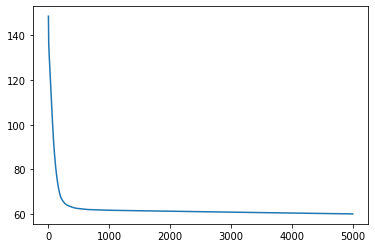

------------------------------------------------------------------
---MSE del entrenamiento---
------------------------------------------------------------------


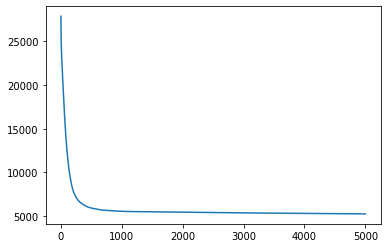

------------------------------------------------------------------
------------------------------------------------------------------
Modelo MAE Ridge:  AGE    0.125289
SEX   -0.012238
BMI    0.117196
BP     0.343285
S1     0.332690
S2     0.170315
S3    -0.143363
S4     0.008569
S5     0.005661
S6     0.253470
dtype: float64 0.0016651131221719787
------------------------------------------------------------------
Error Absoluto final: 60.098817
Error Cuadratico final: 5182.655954
------------------------------------------------------------------
---MAE del entrenamiento---
------------------------------------------------------------------


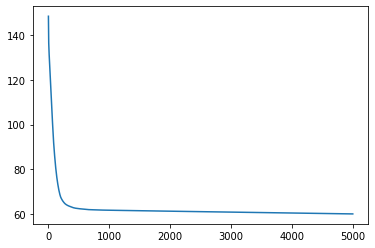

------------------------------------------------------------------
---MSE del entrenamiento---
------------------------------------------------------------------


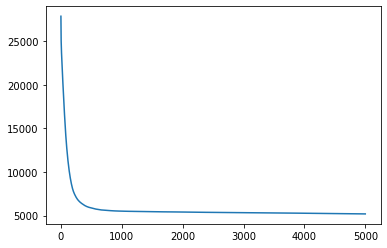

------------------------------------------------------------------


In [ ]:

def gradienteDescMAELasso(dataset,weights,bias,lr,epochs,maxError,regularizacion):
    
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch=0
    x_test= dataset.drop(['Y'],axis=1)
    y_test = dataset['Y']
    sizeBatch=dataset.shape[0]/100
    while coste > maxError and epoch < epochs:        
      yEst = x.dot(weights) + bias
      loss = yEst - y
      
      for l in range(len(loss)):
        if loss[l] < 0:
          loss[l]=-1
        else:
          loss[l]=1
      
      weight_gradient = x.T.dot(loss) / len(y) + regularizacion*errorLasso(weights)
      bias_gradient = np.sum(loss) / len(y) 

      weights = weights - lr*weight_gradient 
      bias = bias - lr*bias_gradient
      
      listaErrorMAE.append(MAE(x_test, y_test, weights, bias))
      listaErrorMSE.append(MSE(x_test, y_test, weights, bias))
      epoch += 1

    return weights, bias, listaErrorMAE, listaErrorMSE

def gradienteDescMAERidge(dataset,weights,bias,lr,epochs,maxError,regularizacion):
    
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch=0
    x_test= dataset.drop(['Y'],axis=1)
    y_test = dataset['Y']
    sizeBatch=dataset.shape[0]/100
    while coste > maxError and epoch < epochs:
      yEst = x.dot(weights) + bias
      loss = yEst - y
      
      for l in range(len(loss)):
        if loss[l] < 0:
          loss[l]=-1
        else:
          loss[l]=1
      
      weight_gradient = x.T.dot(loss) / len(y) + regularizacion*errorRidge(weights)
      bias_gradient = np.sum(loss) / len(y) 
      
      weights = weights - lr*weight_gradient 
      bias = bias - lr*bias_gradient

      listaErrorMAE.append(MAE(x_test, y_test, weights, bias))
      listaErrorMSE.append(MSE(x_test, y_test, weights, bias))
      epoch += 1

    return weights, bias, listaErrorMAE, listaErrorMSE

if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.00001
    ## Fija las epocas
    epochs = 5000
    ## Umbral de error permitido
    maxError = 0.01
    ## Termino de regularizacion
    regularizacion = 1

    #Lasso

    w, b, costMAE, costMSE = gradienteDescMAELasso(data, np.zeros(x.shape[1]), 0, lr,epochs,maxError,regularizacion)

    print("------------------------------------------------------------------")
    print("Modelo MAE Lasso: ", w , b)
    print("------------------------------------------------------------------")
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")
    
    print("---MAE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMAE)
    plt.show()
    print("------------------------------------------------------------------")
    print("---MSE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMSE)
    plt.show()
    print("------------------------------------------------------------------")

    #Ridge
    w, b, costMAE, costMSE = gradienteDescMAERidge(data, np.zeros(x.shape[1]), 0, lr,epochs,maxError,regularizacion)
    print("------------------------------------------------------------------")
    print("Modelo MAE Ridge: ", w , b)
    print("------------------------------------------------------------------")
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")
    
    print("---MAE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMAE)
    plt.show()
    print("------------------------------------------------------------------")
    print("---MSE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMSE)
    plt.show()
    print("------------------------------------------------------------------")

### Gradiente descendiente usando el MSE - Lasso / Ridge

------------------------------------------------------------------
Modelo MAE Lasso:  AGE    0.144278
SEX    0.002485
BMI    0.137427
BP     0.368487
S1     0.331572
S2     0.157160
S3    -0.074570
S4     0.020606
S5     0.003889
S6     0.298992
dtype: float64 0.002127633683068306
------------------------------------------------------------------
Error Absoluto final: 60.517761
Error Cuadratico final: 5095.938561
------------------------------------------------------------------
---MAE del entrenamiento---
------------------------------------------------------------------


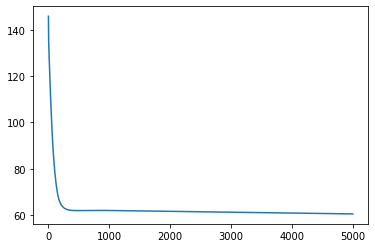

------------------------------------------------------------------
---MSE del entrenamiento---
------------------------------------------------------------------


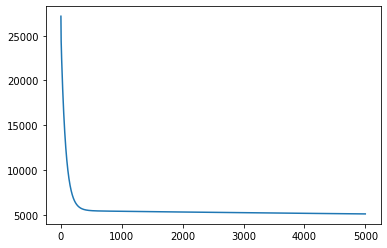

------------------------------------------------------------------
------------------------------------------------------------------
Modelo MAE Ridge:  AGE    0.144561
SEX    0.002982
BMI    0.137816
BP     0.368573
S1     0.331297
S2     0.157200
S3    -0.074286
S4     0.021094
S5     0.003887
S6     0.299098
dtype: float64 0.002123282137254545
------------------------------------------------------------------
Error Absoluto final: 60.518116
Error Cuadratico final: 5095.801029
------------------------------------------------------------------
---MAE del entrenamiento---
------------------------------------------------------------------


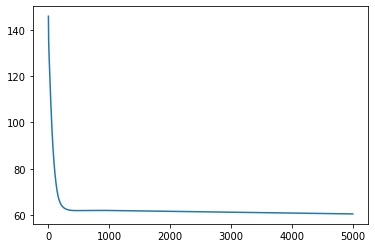

------------------------------------------------------------------
---MSE del entrenamiento---
------------------------------------------------------------------


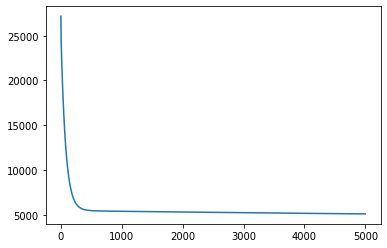

------------------------------------------------------------------


In [ ]:

def gradienteDescMSELasso(data,weights,bias,lr,epochs,maxError,regularizacion):
    
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch = 0
    while coste > maxError and epoch < epochs:
      yEst = x.dot(weights) + bias
      loss = yEst - y

      weight_gradient = x.T.dot(loss) / len(y) + regularizacion*errorLasso(weights)
      bias_gradient = np.sum(loss) / len(y)
      
      weights = weights - lr * weight_gradient
      bias = bias - lr * bias_gradient 

      listaErrorMAE.append(MAE(x, y, weights, bias))
      listaErrorMSE.append(MSE(x, y, weights, bias))
      epoch += 1

    return weights, bias, listaErrorMAE, listaErrorMSE

def gradienteDescMSERidge(data,weights,bias,lr,epochs,maxError,regularizacion):
    
    listaErrorMAE = []
    listaErrorMSE = []
    coste = 10
    epoch = 0
    while coste > maxError and epoch < epochs:
      yEst = x.dot(weights) + bias
      loss = yEst - y

      weight_gradient = x.T.dot(loss) / len(y) + regularizacion*errorRidge(weights)
      bias_gradient = np.sum(loss) / len(y)
      
      weights = weights - lr * weight_gradient 
      bias = bias - lr * bias_gradient 

      listaErrorMAE.append(MAE(x, y, weights, bias))
      listaErrorMSE.append(MSE(x, y, weights, bias))
      epoch += 1

    return weights, bias, listaErrorMAE, listaErrorMSE

if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.0000001
    ## Fija las epocas
    epochs = 5000
    ## Umbral de error permitido
    maxError = 0.01
    ## Termino de regularizacion
    regularizacion = 1

    #Lasso

    w, b, costMAE, costMSE = gradienteDescMSELasso(data, np.zeros(x.shape[1]), 0, lr, epochs, maxError, regularizacion)

    print("------------------------------------------------------------------")
    print("Modelo MAE Lasso: ", w , b)
    print("------------------------------------------------------------------")
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")
    
    print("---MAE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMAE)
    plt.show()
    print("------------------------------------------------------------------")
    print("---MSE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMSE)
    plt.show()
    print("------------------------------------------------------------------")

    #Ridge
    w, b, costMAE, costMSE = gradienteDescMSERidge(data, np.zeros(x.shape[1]), 0, lr, epochs, maxError, regularizacion)
    print("------------------------------------------------------------------")
    print("Modelo MAE Ridge: ", w , b)
    print("------------------------------------------------------------------")
    print("Error Absoluto final:",f'{costMAE[-1]:0.6f}')
    print("Error Cuadratico final:",f'{costMSE[-1]:0.6f}')
    print("------------------------------------------------------------------")
    
    print("---MAE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMAE)
    plt.show()
    print("------------------------------------------------------------------")
    print("---MSE del entrenamiento---")
    print("------------------------------------------------------------------")
    plt.plot(costMSE)
    plt.show()
    print("------------------------------------------------------------------")

##Turi Create

In [ ]:
dataTC =  tc.SFrame(data)

model_ridge = tc.linear_regression.create(dataTC, target='Y', features = list(x), verbose=False, l2_penalty=0.5)
model_lasso = tc.linear_regression.create(dataTC, target='Y', features = list(x), verbose=False, l1_penalty=0.5)
model_enet  = tc.linear_regression.create(dataTC, target='Y', features = list(x), verbose=False, l2_penalty=0.5, l1_penalty=0.5)

print("------------------------------------------------------------------")
print("Modelo Ridge Turi Create:")
print(model_ridge.coefficients)
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print("Modelo Lasso Turi Create:")
print(model_lasso.coefficients)
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print("Modelo ElasticNet Turi Create:")
print(model_enet.coefficients)
print("------------------------------------------------------------------")


------------------------------------------------------------------
Modelo Ridge Turi Create:
+-------------+-------+-----------------------+-----------------------+
|     name    | index |         value         |         stderr        |
+-------------+-------+-----------------------+-----------------------+
| (intercept) |  None |  -108.71118103658773  |   41.24929753458036   |
|     AGE     |  None |  0.06095441008143381  |  0.22706575070253598  |
|     SEX     |  None |  -22.907596605627827  |   6.122401698628652   |
|     BMI     |  None |   5.7395643030630845  |   0.7370490316099005  |
|      BP     |  None |   1.2172267954455698  |  0.23562184417278767  |
|      S1     |  None |   0.5921287644013719  |   0.2794046528675885  |
|      S2     |  None |  -0.8989972794912278  |  0.25169259031952046  |
|      S3     |  None |  -1.3569666695228813  |   0.5749445697130239  |
|      S4     |  None |   10.184995042124822  |   6.233608652953595   |
|      S5     |  None | 0.00294705521729093

##Scikit-Learn

In [ ]:
regrLasso = linear_model.Lasso(alpha=0.5)
regrRidge= linear_model.Ridge(alpha=0.5)
regrEnet=linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)

regrLasso.fit(x, y)
regrRidge.fit(x, y)
regrEnet.fit(x, y)

print("------------------------------------------------------------------")
print("Modelo SKlearn Lasso: ")
print(regrLasso.coef_, regrLasso.intercept_)
print("------------------------------------------------------------------")
print("MAE: ",mean_absolute_error(y, regrLasso.predict(x)))
print("MSE: ",mean_squared_error(y, regrLasso.predict(x)))
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print("Modelo SKlearn Ridge: ")
print(regrRidge.coef_, regrRidge.intercept_)
print("------------------------------------------------------------------")
print("MAE: ",mean_absolute_error(y, regrRidge.predict(x)))
print("MSE: ",mean_squared_error(y, regrRidge.predict(x)))
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print("Modelo SKlearn Enet: ")
print(regrEnet.coef_, regrEnet.intercept_)
print("------------------------------------------------------------------")
print("MAE: ",mean_absolute_error(y, regrEnet.predict(x)))
print("MSE: ",mean_squared_error(y, regrEnet.predict(x)))
print("------------------------------------------------------------------")

------------------------------------------------------------------
Modelo SKlearn Lasso: 
[ 2.62381170e-02 -2.03924211e+01  6.08904727e+00  1.15941147e+00
  1.14394186e+00 -1.30175314e+00 -2.15032993e+00  2.20551835e+00
  2.67554241e-03  3.67479798e-01] -92.53977519841385
------------------------------------------------------------------
MAE:  44.43535669325782
MSE:  2972.2151228800185
------------------------------------------------------------------
------------------------------------------------------------------
Modelo SKlearn Ridge: 
[ 3.90691133e-02 -2.30172572e+01  6.08177750e+00  1.18374605e+00
  1.07570079e+00 -1.28736708e+00 -1.98183543e+00  4.76789807e+00
  2.72668274e-03  3.67439741e-01] -99.01609811444052
------------------------------------------------------------------
MAE:  44.34016777661671
MSE:  2969.6511695872946
------------------------------------------------------------------
------------------------------------------------------------------
Modelo SKlearn Enet: 